In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from collections import Counter
import matplotlib.patches as mpatches
import scipy.stats
from scipy.sparse import csgraph
from sklearn.decomposition import PCA
import scipy
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn import metrics
import gget
from scipy.stats import gmean


# locals
import utils as ut


In [2]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scanpy/"

adata = {}

for f in os.listdir(dirPath):
    
    if f.endswith('.h5ad'):
        key = f.split(".")[0]
        fullPath = f"{dirPath}{f}"
        data = sc.read(fullPath)
        adata[key] = data
    
print("done")

done


In [3]:
cardOutDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDOuputs/"

dfList = []

for f in os.listdir(cardOutDir):
    if 'macrophage' in f:
        fullPath = f"{cardOutDir}{f}"
        key = f.split("_")[0]
        df = pd.read_csv(fullPath)
        df = df.rename(columns={'Unnamed: 0' : 'spotId'})
        df['key'] = key
        dfList.append(df)

df = pd.concat(dfList, ignore_index=True)
print(f"{df.shape=}")
print(df['key'].value_counts())
print()
cTypes = df.columns.to_list()
cTypes.remove("key")
cTypes.remove("spotId")
print(cTypes)
print()
df.head()

df.shape=(14836, 13)
HFD8     6782
ND       4068
HFD14    3986
Name: key, dtype: int64

['Dendritic cells', 'Mac4', 'Stromal cells', 'NK cells', 'Mac2', 'Monocytes', 'T cells', 'Mac5', 'Mac3', 'Mac1', 'B cells']



,spotId,Dendritic cells,Mac4,Stromal cells,NK cells,Mac2,Monocytes,T cells,Mac5,Mac3,Mac1,B cells,key
0,AAACAAGTATCTCCCA.1,0.087213,0.113186,0.270488,0.096431,0.057255,0.083130,0.047384,0.163491,0.049659,0.006606,0.025157,HFD8
1,AAACACCAATAACTGC.1,0.159247,0.129071,0.105884,0.002606,0.084753,0.088446,0.016601,0.302068,0.046115,0.038813,0.026395,HFD8
2,AAACAGCTTTCAGAAG.1,0.042437,0.128286,0.329050,0.064440,0.050805,0.049080,0.052493,0.100578,0.065773,0.025274,0.091783,HFD8
3,AAACAGGGTCTATATT.1,0.038153,0.094966,0.294255,0.055503,0.061959,0.060107,0.048176,0.127678,0.099188,0.040547,0.079468,HFD8
4,AAACAGTGTTCCTGGG.1,0.000020,0.256841,0.323585,0.003329,0.015668,0.010229,0.002518,0.222850,0.000587,0.000737,0.163636,HFD8


In [4]:
sptDir =  "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

spt = {}

for f in os.listdir(sptDir):
    if "spt" in f and "macrophage" in f:
        print(f)
        fullPath = f"{sptDir}{f}"
        key = f.split("_")[0]
        sdf = pd.read_csv(fullPath)
        sdf = sdf.rename(columns={'Unnamed: 0' : 'gene'})
        sdf = sdf.set_index('gene')
        sdf = sdf.T
        sdf.index = sdf.index.str.replace("-", ".")
        spt[key] = sdf
    
print('done')

HFD8_macrophage_spt.csv
HFD14_macrophage_spt.csv
ND_macrophage_spt.csv
done


In [5]:
fPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/LR/LewisLabUSCS/Mouse/Mouse-2020-Baccin-LR-pairs.xlsx"

lr = pd.read_excel(fPath)
print(lr.shape)

lr['ligand'] = lr['Ligand.Mouse'].str.upper()
lr['receptor'] = lr['Receptor.Mouse'].str.upper()
lr.head()

(2000, 8)


,Pair.Name,Ligand.Mouse,Receptor.Mouse,Source,ManualAnnotation,Ligand.CC,Ligand.GO,Reference (PMID / KEGG),ligand,receptor
0,A2m-Lrp1,A2m,Lrp1,Ramilowski,Correct,Secreted,Other,"1702392,10652313, 12194978",A2M,LRP1
1,Adgre5-Cd55,Adgre5,Cd55,Baccin,Correct,Membrane,Other,23447688,ADGRE5,CD55
2,Adipoq-Adipor1,Adipoq,Adipor1,Ramilowski,Correct,Secreted,Other,12802337,ADIPOQ,ADIPOR1
3,Adipoq-Adipor2,Adipoq,Adipor2,Ramilowski,Correct,Secreted,Other,"12802337, 12802330",ADIPOQ,ADIPOR2
4,Adm-Calcrl&Ramp2,Adm,Calcrl&Ramp2,Baccin,Correct,Secreted,Other,10342881,ADM,CALCRL&RAMP2


In [6]:
coordDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

dfList = []

for f in os.listdir(coordDir):
    if "coord" in f:
        fullPath = f"{coordDir}{f}"
        key = f.split("_")[0]
        cdf = pd.read_csv(fullPath)
        cdf = cdf.rename(columns={'Unnamed: 0' : 'spotId'})
        cdf['key'] = key
        dfList.append(cdf)

cdf = pd.concat(dfList, ignore_index=True)
print(f"{cdf.shape=}")
print(cdf['key'].value_counts())
print()
cdf.head()

cdf.shape=(14848, 4)
HFD8     6788
ND       4072
HFD14    3988
Name: key, dtype: int64



,spotId,x,y,key
0,AAACATTTCCCGGATT.1,1139.783401,1365.804581,HFD14
1,AAACCGGGTAGGTACC.1,468.056902,1045.415505,HFD14
2,AAACCGTTCGTCCAGG.1,604.524374,1214.452428,HFD14
3,AAACCTAAGCAGCCGG.1,1003.708924,1433.743571,HFD14
4,AAACCTCATGAAGTTG.1,380.369919,960.970730,HFD14


In [7]:
"""Merge CARD predictions with spatial coordinates"""
df = pd.merge(cdf, df,
              how='left', 
              left_on=['spotId', 'key'],
              right_on=['spotId', 'key'])

df = df.fillna(0)
df = df.drop_duplicates() # very important!
print(df['key'].value_counts())
df.head()

HFD8     3394
ND       2036
HFD14    1994
Name: key, dtype: int64


,spotId,x,y,key,Dendritic cells,Mac4,Stromal cells,NK cells,Mac2,Monocytes,T cells,Mac5,Mac3,Mac1,B cells
0,AAACATTTCCCGGATT.1,1139.783401,1365.804581,HFD14,3.468007e-02,0.007548,0.409201,0.170860,0.004757,0.041542,0.055275,0.219997,0.010912,0.004188,0.041040
2,AAACCGGGTAGGTACC.1,468.056902,1045.415505,HFD14,1.280364e-03,0.088368,0.187514,0.019633,0.028867,0.129969,0.040070,0.450618,0.008903,0.013757,0.031021
4,AAACCGTTCGTCCAGG.1,604.524374,1214.452428,HFD14,3.752028e-04,0.004256,0.283055,0.187004,0.021560,0.108340,0.044845,0.310869,0.003200,0.004016,0.032480
6,AAACCTAAGCAGCCGG.1,1003.708924,1433.743571,HFD14,1.198581e-07,0.009084,0.239973,0.043516,0.004948,0.057287,0.052469,0.558332,0.000064,0.023214,0.011113
8,AAACCTCATGAAGTTG.1,380.369919,960.970730,HFD14,1.377525e-02,0.029749,0.216199,0.122802,0.053188,0.158933,0.041466,0.234411,0.043126,0.037127,0.049224


In [33]:
keys = ['ND', 'HFD8', 'HFD14']

lrData = {}

for key in keys:
    sdf = spt[key]
    newCols = {}
    
    for idx, row in lr.iterrows():
        l = row['ligand']
        r = row['receptor']
        
        if l in sdf.columns and r in sdf.columns:
            gMean = scipy.stats.gmean(sdf[[l, r]], axis=1)
            lrName = row['Pair.Name']
            newCols[lrName] = gMean
    
    lrdf = pd.DataFrame(newCols)
    lrdf.index = sdf.index
    
    # remove zero-sum columns 
    lrdf = lrdf.loc[:, (lrdf.sum(axis=0) != 0)]
    print(sdf.shape, lrdf.shape)
    
    lrData[key] = lrdf


print('done')

(2036, 31053) (2036, 124)
(3394, 31053) (3394, 253)
(1994, 31053) (1994, 270)
done


In [8]:
irePath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/annotations/IRE1_substrates.txt"
ire = [x.upper().strip() for x in open(irePath)]
print(f"{len(ire)=}")
ire[:10]

len(ire)=809


['NARF',
 'FER',
 'XPO6',
 'ACVR1B',
 'B9D1',
 'PCNT',
 'LSR',
 'PFDN5',
 'ITGA3',
 'NUP214']

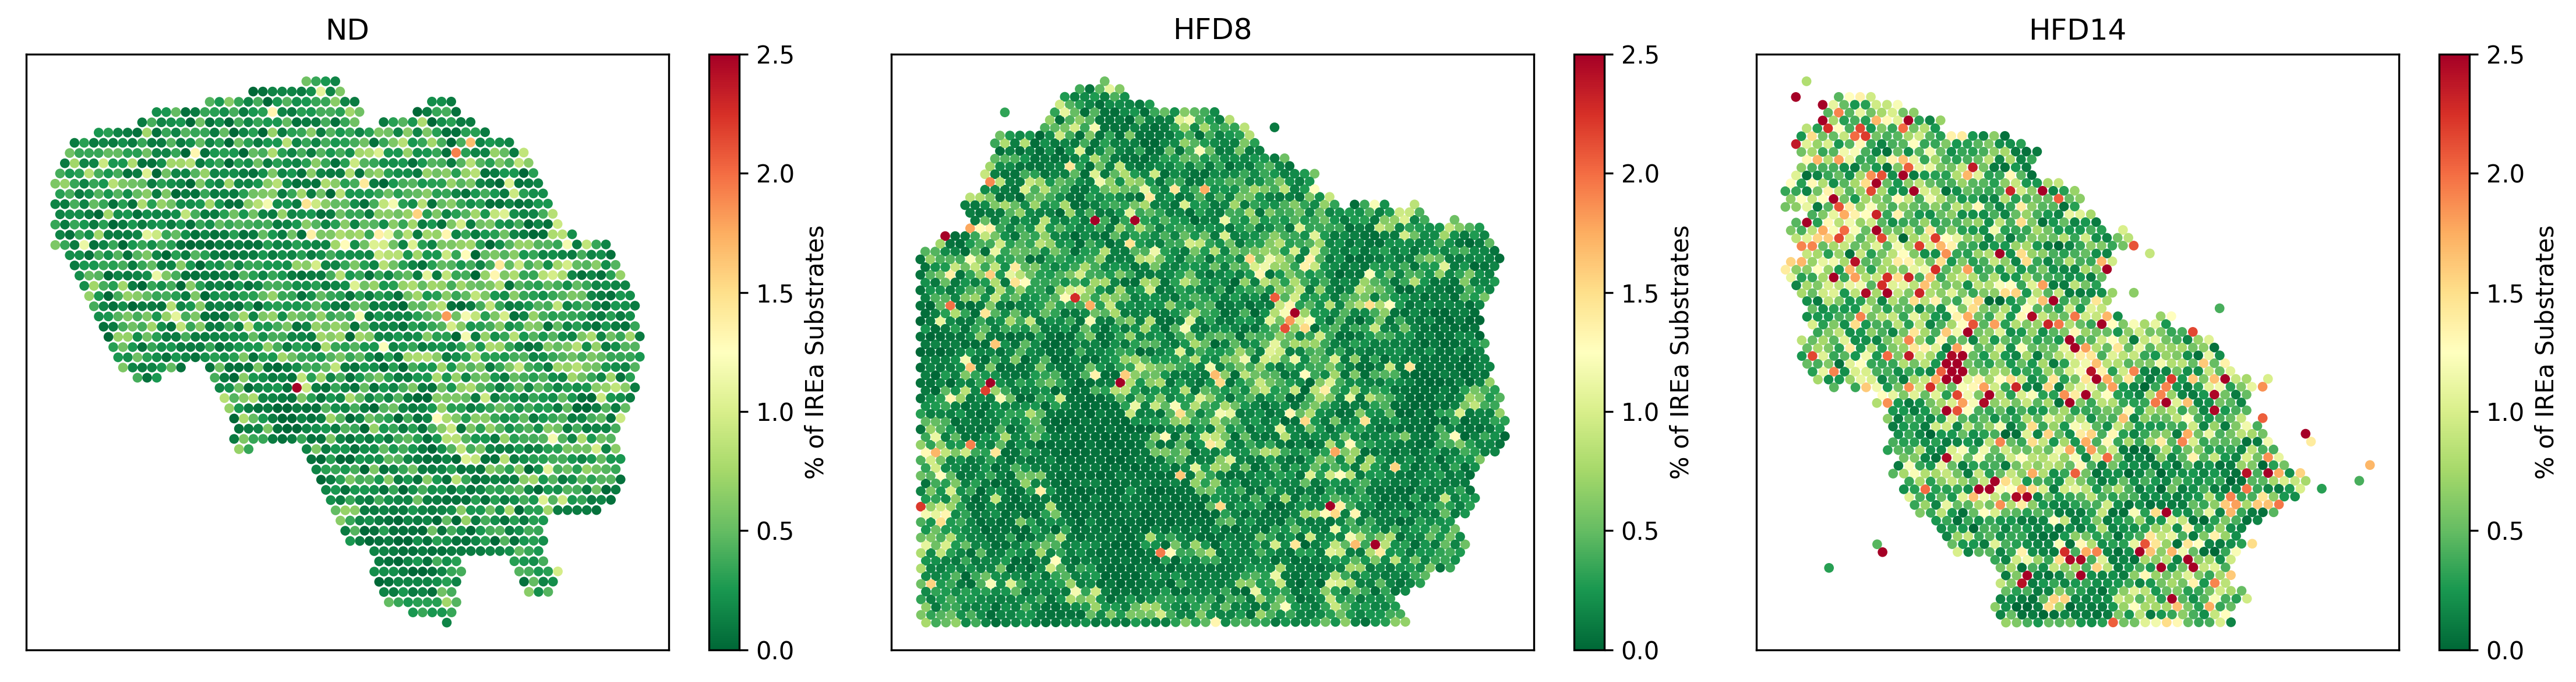

In [13]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 15, 4
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
cmap = 'RdYlGn_r'

for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    
    X = sdf[ire].astype(bool)
    rowSums = (X.sum(axis=1) / len(X)) * 100
    
    p = axs[i].scatter(kdf['x'], 
                       kdf['y'], 
                       c=rowSums, 
                       marker=".", 
                       vmin=0, 
                       vmax=2.5, 
                       cmap=cmap)

    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
    axs[i].invert_yaxis()
    axs[i].set_title(key)
    plt.colorbar(p, ax=axs[i], label="% of IREa Substrates")    
    
plt.tight_layout() 


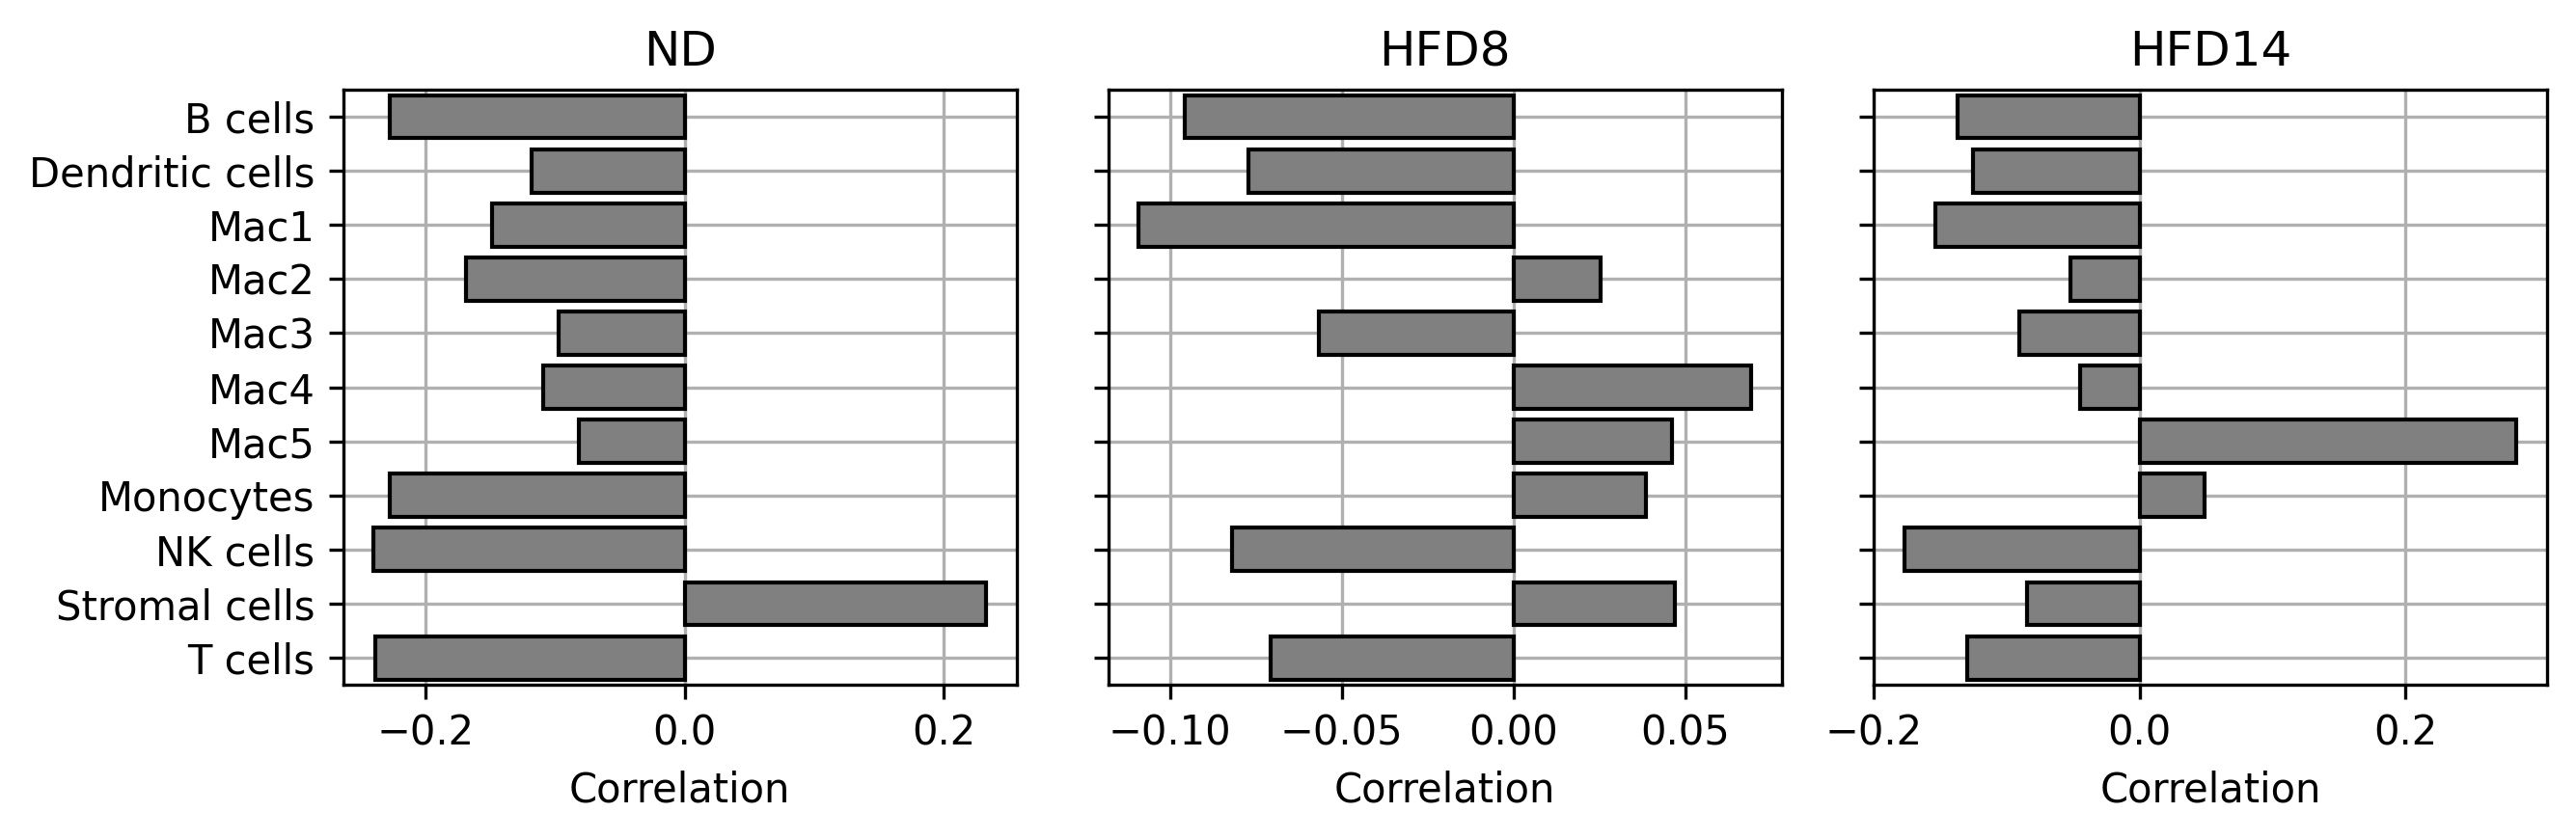

In [32]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 9, 3
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3, sharey=True)
axs = axs.ravel()
cmap = 'RdYlGn_r'


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    
    X = sdf[ire].astype(bool)
    exp = (X.sum(axis=1) / len(X))
    res = []
    
    for cType in cTypes:
        r = scipy.stats.pearsonr(exp, kdf[cType])
        row = {
            'key' : key, 
            'cType' : cType, 
            'r' : r[0],
            'pval' : r[1],
        }
        res.append(row)
        
    res = pd.DataFrame(res)
    res = res.sort_values(by='cType')
    
    sns.barplot(data=res, 
                x='r', 
                y='cType',
                color='grey',
                edgecolor='k',
                zorder=2,
                ax=axs[i])
    
    axs[i].set_xlabel("Correlation")
    axs[i].set_ylabel("")
    axs[i].set_title(key)
    axs[i].grid(zorder=1)

plt.tight_layout()

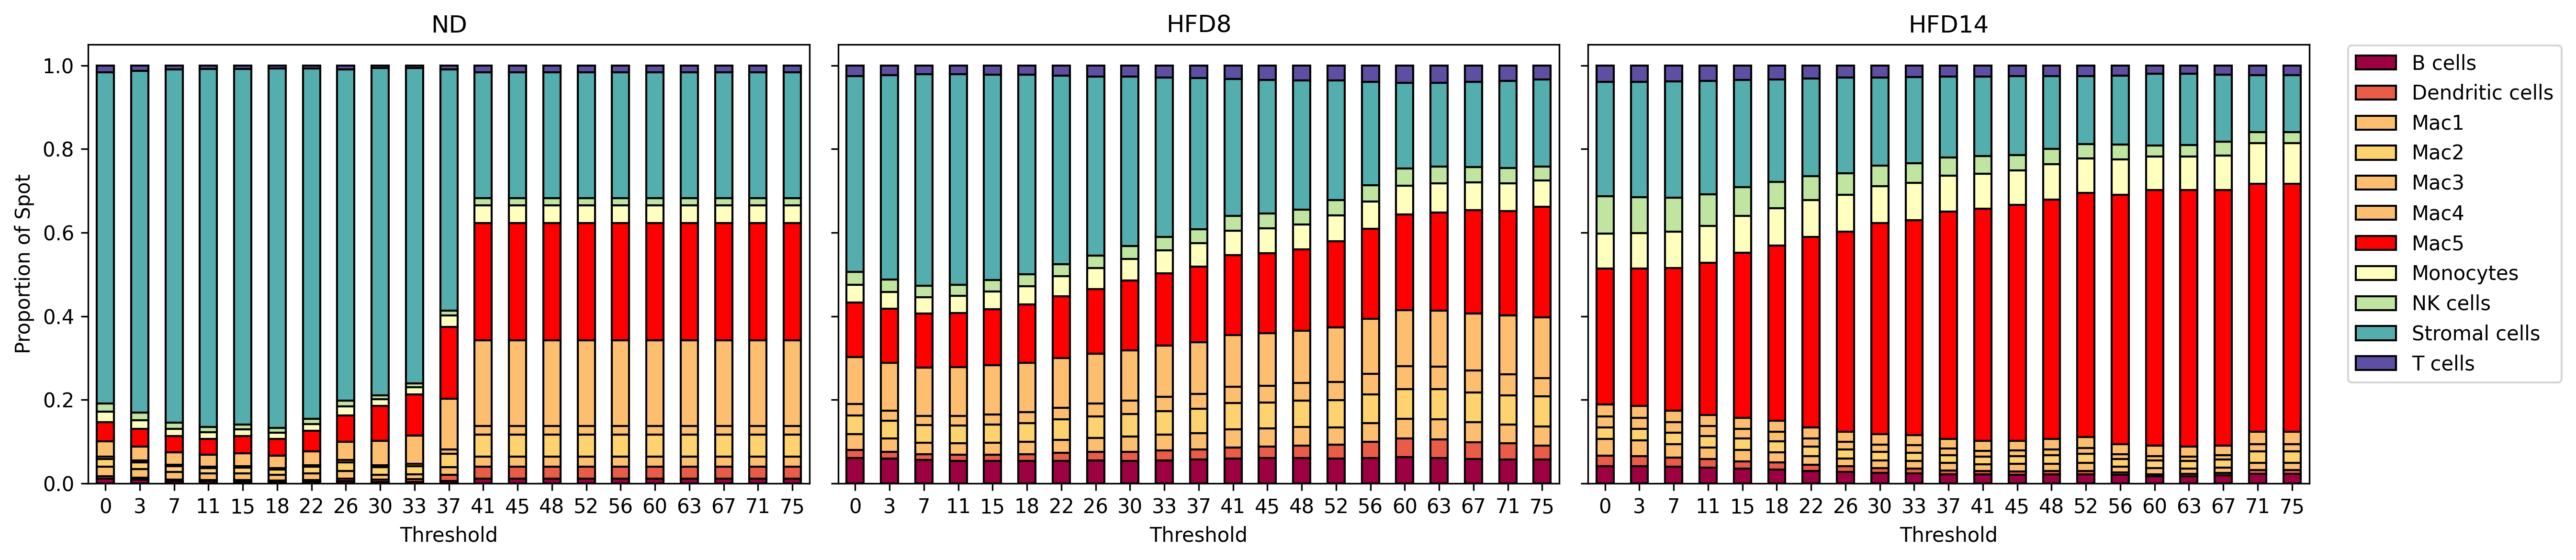

In [98]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 18, 4
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3, sharey=True)
axs = axs.ravel()
cmap = 'RdYlGn_r'
tRange = np.linspace(0, 75, 21).astype(int)


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    lrdf = lrData[key]
    
    rowSum = sdf[ire].astype(bool).sum(axis=1) 
    
    res = []
    
    for t in tRange:
        mask = (rowSum > t)
        spotIds = sdf[mask].index
        spots = kdf[kdf['spotId'].isin(spotIds)]

        props = pd.DataFrame(spots[cTypes].mean(axis=0))
        props['t'] = t
        res.append(props)

        
    res = pd.concat(res)
    res = res.reset_index(drop=False)
    res.columns = ['cellType', 'proportion', 'threshold']
    
    res2 = pd.pivot_table(res, 
                          values='proportion', 
                          index=['cellType'], 
                          columns='threshold').reset_index()
    
    color = ['#9e0142', 
             '#e95c47', 
             '#fdbf6f', 
             '#fdd26f',
             '#fdbf6f',
             '#fdbf6f', 
             'r', # mac5
             '#ffffbe',
             '#bfe5a0', 
             '#54aead',
             '#5e4fa2',
        ]

    res2 = res2.set_index('cellType')
    res2.T.plot(kind='bar', 
                stacked=True, 
                edgecolor='k', 
                ax=axs[i], 
                legend=False,
                color=color)
    
    
    handles = []
    
    for ic, ctype in enumerate(sorted(cTypes)):
        
        handle = mpatches.Patch(color=color[ic], 
                                ec='k', 
                                label=ctype)
        handles.append(handle)
        
    axs[i].set_ylabel('Proportion of Spot')
    axs[i].tick_params(labelrotation=0)
    axs[i].set_xlabel("Threshold")
    axs[i].set_title(key)
    

plt.legend(handles=handles, bbox_to_anchor=(1.04, 1.02))
plt.tight_layout()    

==== ND ====
                 LR  Proportion
98          C3-Cd81    0.309524
15        Cdh5-Cdh5    0.190476
116      Gnas-Adrb3    0.166667
52        Mcam-Mcam    0.142857
19      Col1a1-Cd36    0.119048
20      Col1a2-Cd36    0.095238
100         C3-Lrp1    0.095238
50         Lpl-Lrp1    0.095238
1    Adipoq-Adipor2    0.071429
62      Ptprm-Ptprm    0.071429
88         Cav1-App    0.071429
81         App-Cav1    0.071429
80      Aplp2-H2-D1    0.047619
60        Psap-Lrp1    0.047619
59    Pecam1-Pecam1    0.047619

[['C3', 'Cd81'], ['Cdh5', 'Cdh5'], ['Gnas', 'Adrb3'], ['Mcam', 'Mcam'], ['Col1a1', 'Cd36'], ['Col1a2', 'Cd36'], ['C3', 'Lrp1'], ['Lpl', 'Lrp1'], ['Adipoq', 'Adipor2'], ['Ptprm', 'Ptprm'], ['Cav1', 'App'], ['App', 'Cav1'], ['Aplp2', 'H2', 'D1'], ['Psap', 'Lrp1'], ['Pecam1', 'Pecam1']]
==== HFD8 ====
              LR  Proportion
35   Col1a1-Cd36    0.384279
202      C3-Cd81    0.323144
40   Col1a2-Cd36    0.216157
89      Lpl-Lrp1    0.157205
170     Cav1-App    0.141921


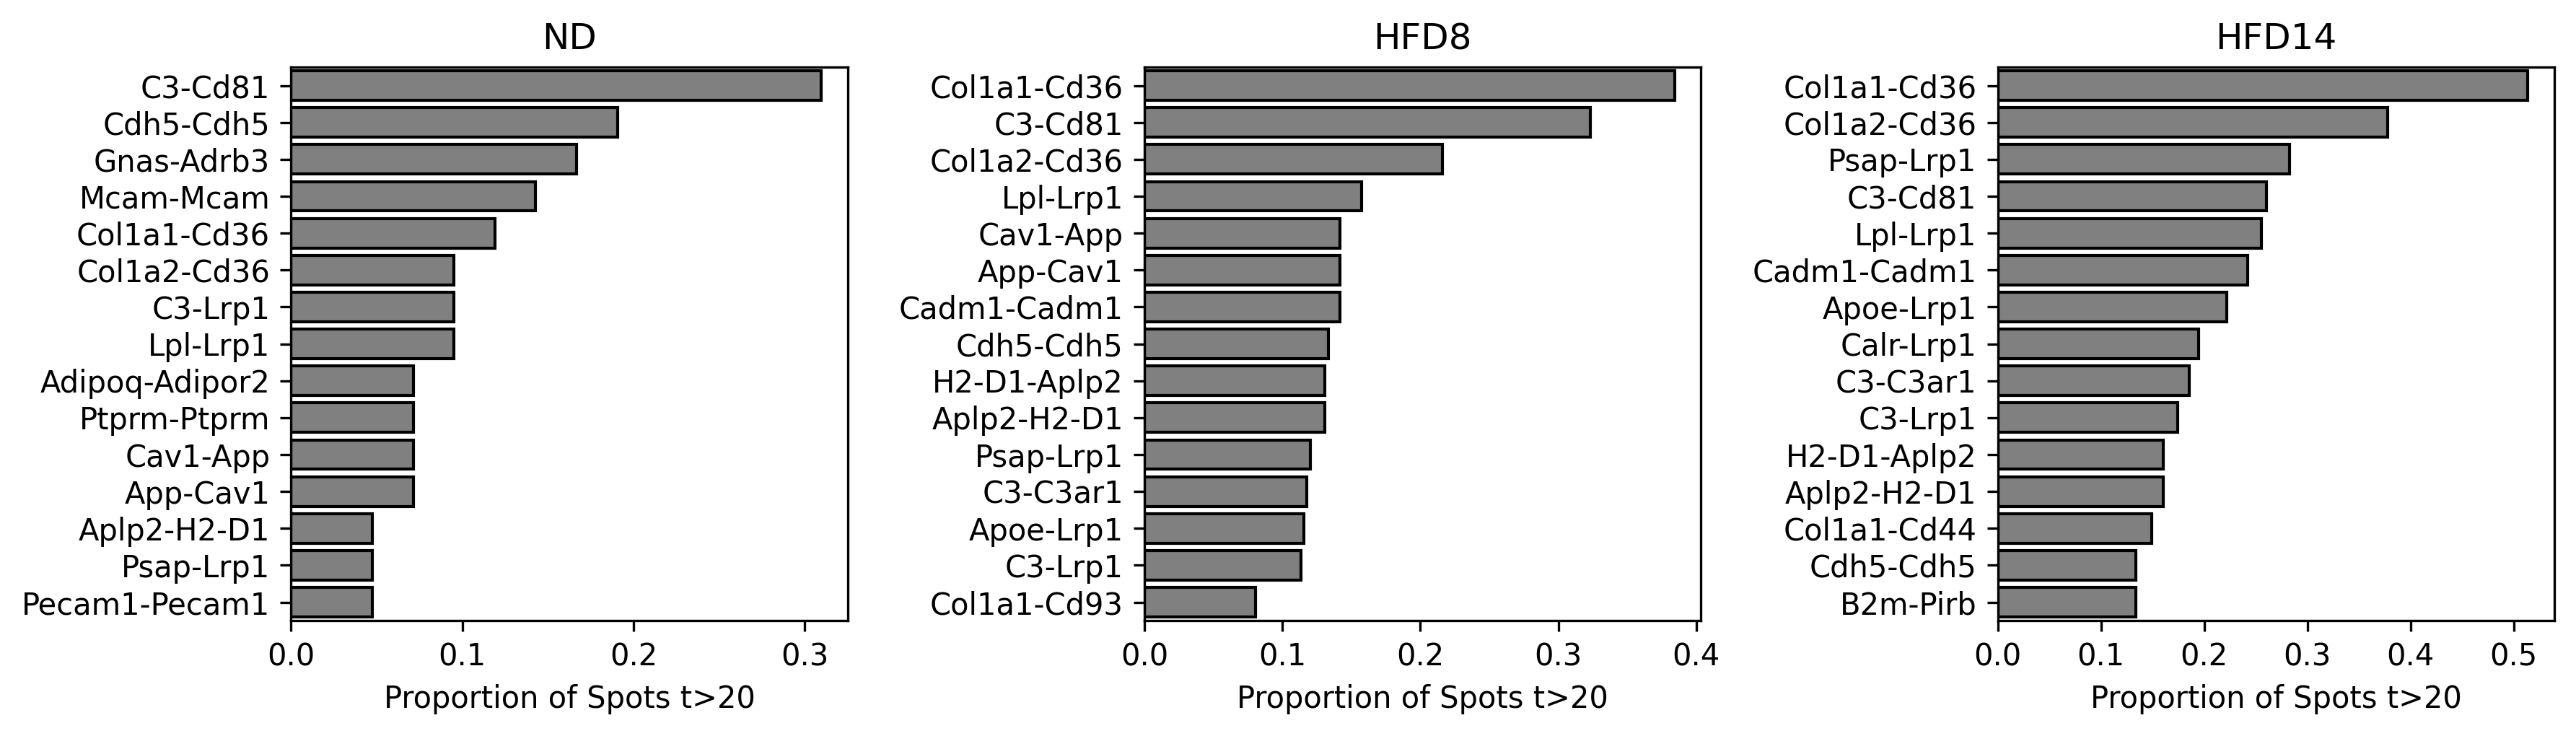

In [117]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 12, 3.5
plt.rcParams['figure.facecolor'] = "w"

def flatten(l):
    return [item for sublist in l for item in sublist]


fig, axs = plt.subplots(1, 3, sharey=False)
axs = axs.ravel()

t = 20
n = 15


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    lrdf = lrData[key]
    
    rowSum = sdf[ire].astype(bool).sum(axis=1) 
    mask = (rowSum > t)
    
    spotIds = sdf[mask].index
    ldfBool = lrdf[lrdf.index.isin(spotIds)].astype(bool)
    
    colSumns = ldfBool.sum(axis=0)
    prop = colSumns / len(ldfBool)
    prop = pd.DataFrame(prop)
    prop = prop.reset_index(drop=False)
    prop.columns = ['LR', 'Proportion']
    prop = prop.sort_values(by='Proportion', ascending=False)
    print(f"==== {key} ====")
    print(prop.head(n))
    
    print()
    lrList = [x.split("-") for x in prop['LR'].head(n)]
    print(flatten(lrList))
    
    sns.barplot(data=prop.head(n),
                y='LR', 
                x='Proportion', 
                color='grey',
                edgecolor='k',
                ax=axs[i])
        
    axs[i].set_ylabel("")
    axs[i].set_xlabel(f"Proportion of Spots t>{t}")
    axs[i].set_title(key)

plt.tight_layout()

In [100]:
lrdf.head()

,Adipoq-Adipor1,Adipoq-Adipor2,Apoe-Ldlr,Apoe-Lrp1,Apoe-Lrp5,Apoe-Scarb1,Apoe-Sorl1,Apoe-Vldlr,Bgn-Tlr4,Cadm1-Cadm1,...,Fgf2-Fgfrl1,Gnai2-Tshr,Gnas-Adrb3,Gnas-Ptgir,Gnas-Tshr,Il16-Kcnj15,Inhbb-Acvr1c,Pf4-Thbd,Rarres2-Cmklr1,Tshr-Gnai2
AAACAAGTATCTCCCA.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGGGTCTATATT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTTCCCGGATT.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCGAACGAAATC.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
